## Import dei dati 

In [162]:
#Cose noiose da importare
import matplotlib.pyplot as plot
import pandas as pd
import squarify as sqr
from matplotlib.pyplot import figure
import datetime as dt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import calendar
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from datetime import date, timedelta
import plotly.express as px
import plotly.graph_objects as go
import datetime

In [163]:
#Dati anagrafici dei pazienti
anagrafica_vaccini_summary_latest = pd.read_csv ('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/anagrafica-vaccini-summary-latest.csv', sep = ',')

#Dati sulle somministrazioni dei vaccini
somministrazioni_vaccini = pd.read_csv ('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv', sep = ',')

#Dati sulle consegne dei fornitori
consegne_vaccini_latest = pd.read_csv ('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv', sep = ',')

#Dati sulle somministrazioni (Summary latest)
somministrazioni_vaccini_sl = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv', sep=',')



# Dati anagrafica dosi

In [164]:
#Prendo solo la fascia anagrafica, il totale delle somministrazioni e il numero di prime e seconde dosi dal file
anagrafica = anagrafica_vaccini_summary_latest[['fascia_anagrafica', 'totale', 'prima_dose', 'seconda_dose']]

In [165]:
#Mi salvo in variabili i valori: 
labels = [] #Etichette delle fasce anagrafiche
prima_dose = [] #Totale prime dosi (Per fascia anagrafica)
seconda_dose = [] #Totale seconde dosi (Per fascia anagrafica)
totale = 0 #Somministrazioni totali (Per fascia anagrafica)
totale_sommin = 0; #Somma totale di tutte le somministrazioni

for i in range(len(anagrafica['fascia_anagrafica'])):
    labels.append(anagrafica['fascia_anagrafica'][i])
    prima_dose.append(anagrafica['prima_dose'][i])    
    seconda_dose.append(anagrafica['seconda_dose'][i])
    totale_sommin += anagrafica['totale'][i]
    totale += anagrafica['seconda_dose'][i]

## Grafico stacked bar plot

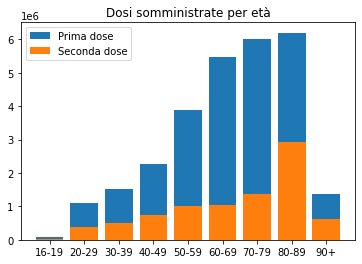

In [166]:
#Data la fascia, nel grafico a barre impilato so quante tra queste sono prime e seconde dosi
fig, ax = plot.subplots()

width = 0.8
ax.bar(labels, prima_dose, width, label='Prima dose', bottom=seconda_dose)
ax.bar(labels, seconda_dose, width, label='Seconda dose')

#plot.axis('off')
ax.set_title('Dosi somministrate per età')
ax.legend()
#plot.savefig(fname='grafico_stackedbarplot.svg')

plot.show()

# Grafici a torta per fascia di età

### Funzione

In [167]:
#Funzione: Crea grafici a torta dato il numero di vaccinati, non vaccinati e quelli con solo la prima dose
def pie_graph_3values(vax, primadose, nonvax, title):
    
    labels = 'Vaccinati', 'Solo prima dose', 'Non vaccinati'

    sizes = [vax, primadose, nonvax]
    explode = (0.1, 0, 0)
    colors = ['#E31E82','#FDD001','#0065CC']

    fig1, ax1 = plot.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
    ax1.axis('equal')
    plot.title(title) 
    #plot.savefig(fname='grafico_' + title + '.svg')

    return (plot.show())

### Dal totale delle somministrazioni prendo Johnson & Johnson che è monodose

In [168]:
#Dal csv prendo solo i valori che mi interessano (Questo è molto piu completo, qui ho i fornitori)
fornitore_fasce = somministrazioni_vaccini[['fornitore','fascia_anagrafica', 'prima_dose', 'seconda_dose']]

In [169]:
#Dal dataframe di sopra prendo solo le somministrazioni con Johnson & Johnson. Ordino così il dataframe raggrupandolo per fascia d'età e sommando le prime dosi della fascia
janssen_fasce = somministrazioni_vaccini[['fornitore','fascia_anagrafica', 'prima_dose']].loc[fornitore_fasce['fornitore'] == 'Janssen'].groupby('fascia_anagrafica')['prima_dose'].sum().reset_index()
janssen_fasce #Janssen è monodose

,fascia_anagrafica,prima_dose
0,16-19,166
1,20-29,5389
2,30-39,5605
3,40-49,7743
4,50-59,39462
5,60-69,130108
6,70-79,70759
7,80-89,2374
8,90+,1259


### Numero abitanti per fascia anagrafica

In [170]:
#Salvo nelle variabili il numero di persone totali facenti parte nella rispettiva fascia anagrafica (Fonte: ISTAT 2020)
decenn = 2871056 #16-19
ventenn = 2955888 + 3128494 #20-29
trentenn = 3282441 + 3572191 #30-39
quarantenn = 4187464 + 4749765 #40-49
cinquantenn = 4876704 + 4537491 #50-59
sessantenn = 3893350 + 3471014 #60-69
settantenn = 3324360 + 2644013 #70-79
ottantenn = 2231536 + 1396624 #80-89
ultranovant = 616360 + 160379 + 14804 #90+

In [171]:
#Preparo le variabili da inviare alla funzione per creare i grafici

#Fascia 16-19
vaccinati19 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '16-19']['seconda_dose'] + janssen_fasce['prima_dose'][0]
primadose19 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '16-19']['prima_dose'] - vaccinati19
nonvax19 = (decenn - (primadose19+vaccinati19))
#Fascia 20-29
vaccinati29 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '20-29']['seconda_dose'] + janssen_fasce['prima_dose'][1]
primadose29 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '20-29']['prima_dose'] - vaccinati29
nonvax29 = (ventenn - (primadose29+vaccinati29))
#Fascia 30-39
vaccinati39 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '30-39']['seconda_dose'] + janssen_fasce['prima_dose'][2]
primadose39 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '30-39']['prima_dose'] - vaccinati39
nonvax39 = (trentenn - (primadose39+vaccinati39))
#Fascia 40-49
vaccinati49 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '40-49']['seconda_dose'] + janssen_fasce['prima_dose'][3]
primadose49 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '40-49']['prima_dose'] - vaccinati49
nonvax49 = (quarantenn - (primadose49+vaccinati49))
#Fascia 50-59
vaccinati59 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '50-59']['seconda_dose'] + janssen_fasce['prima_dose'][4]
primadose59 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '50-59']['prima_dose'] - vaccinati59
nonvax59 = (cinquantenn - (primadose59+vaccinati59))
#Fascia 60-69
vaccinati69 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '60-69']['seconda_dose'] + janssen_fasce['prima_dose'][5]
primadose69 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '60-69']['prima_dose'] - vaccinati69
nonvax69 = (sessantenn - (primadose69+vaccinati69))
#Fascia 70-79
vaccinati79 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '70-79']['seconda_dose'] + janssen_fasce['prima_dose'][6]
primadose79 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '70-79']['prima_dose'] - vaccinati79
nonvax79 = (settantenn - (primadose79+vaccinati79))
#Fascia 80-89
vaccinati89 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '80-89']['seconda_dose'] + janssen_fasce['prima_dose'][7]
primadose89 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '80-89']['prima_dose'] - vaccinati89
nonvax89 = (ottantenn - (primadose89+vaccinati89))
#Fascia 90-longlife
vaccinati99 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '90+']['seconda_dose'] + janssen_fasce['prima_dose'][8]
primadose99 = anagrafica.loc[anagrafica['fascia_anagrafica'] == '90+']['prima_dose'] - vaccinati99
nonvax99 = (ultranovant - (primadose99+vaccinati99))

## Creazione grafici

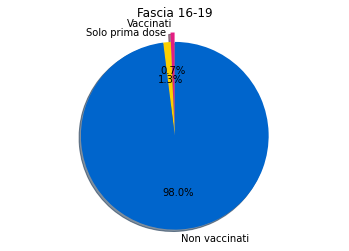

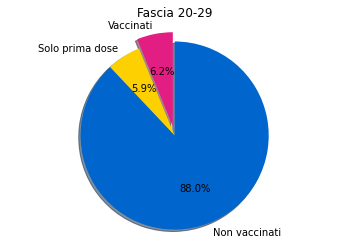

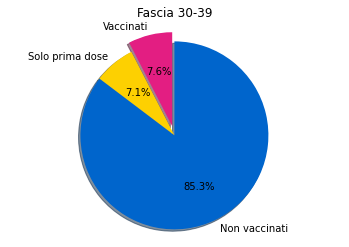

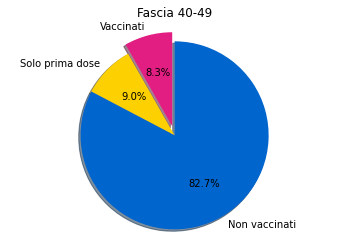

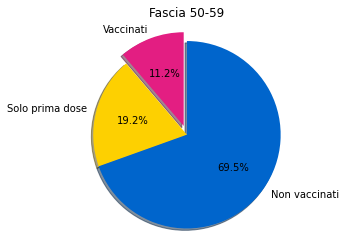

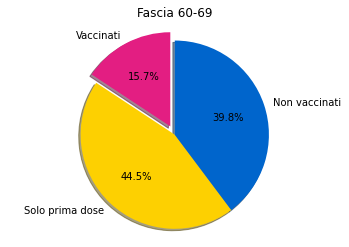

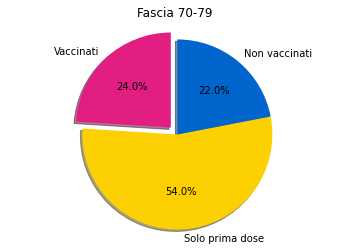

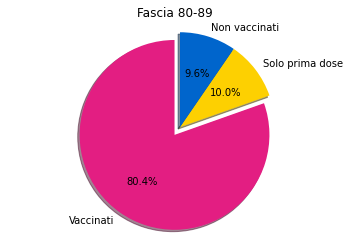

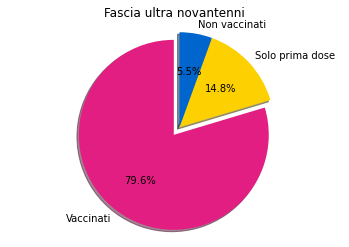

In [172]:
pie_graph_3values(vaccinati19, primadose19, nonvax19[0], "Fascia 16-19")
pie_graph_3values(vaccinati29, primadose29, nonvax29[1], "Fascia 20-29")
pie_graph_3values(vaccinati39, primadose39, nonvax39[2], "Fascia 30-39")
pie_graph_3values(vaccinati49, primadose49, nonvax49[3], "Fascia 40-49")
pie_graph_3values(vaccinati59, primadose59, nonvax59[4], "Fascia 50-59")
pie_graph_3values(vaccinati69, primadose69, nonvax69[5], "Fascia 60-69")
pie_graph_3values(vaccinati79, primadose79, nonvax79[6], "Fascia 70-79")
pie_graph_3values(vaccinati89, primadose89, nonvax89[7], "Fascia 80-89")
pie_graph_3values(vaccinati99, primadose99, nonvax99[8], "Fascia ultra novantenni")


# Curiosità: Quanti vaccinati per "altre" esigenze 

In [173]:
#Persone che fanno vaccini con categoria Altro divisi per regione e età
furbetti_altro_eta = somministrazioni_vaccini[['fascia_anagrafica', 'categoria_altro']].groupby('fascia_anagrafica')['categoria_altro'].sum().reset_index()
furbetti_altro_regione = somministrazioni_vaccini[['nome_area', 'categoria_altro']].groupby('nome_area')['categoria_altro'].sum().reset_index()
furbetti_altro_regione.sort_values(by=['categoria_altro'])

,nome_area,categoria_altro
18,Umbria,1698
10,Molise,2045
19,Valle d'Aosta / Vallée d'Aoste,2698
1,Basilicata,9361
5,Friuli-Venezia Giulia,11362
9,Marche,12923
11,Piemonte,12948
15,Sardegna,16337
0,Abruzzo,18159
7,Liguria,26870


# Fornitore per fascia di età

Text(0, 0.5, 'Dosi somministrate')

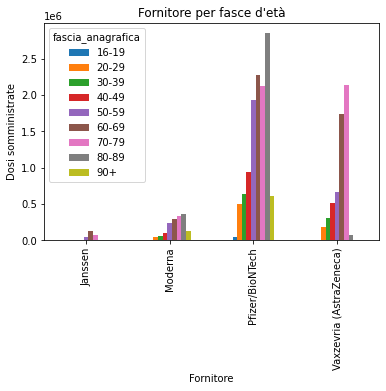

In [174]:
#Vogliamo conoscere il fornitore che vaccina di piu per fascia di età
fasce = fornitore_fasce.groupby(['fornitore', 'fascia_anagrafica'])['prima_dose'].sum().reindex().unstack()

fasce.plot(kind="bar")
plot.title("Fornitore per fasce d'età")
plot.xlabel("Fornitore")
plot.ylabel("Dosi somministrate")

### Funzione

In [175]:
#Creo la funzione per generare grafici a torta
def pie_graph_fornitore(fascia, title):
    
    labels = fascia.index[0], fascia.index[1], fascia.index[2], fascia.index[3]

    sizes = [fascia[0], fascia[1], fascia[2], fascia[3]]
    explode = (0, 0, 0, 0)
    colors = ['#2EC4B6','#FDD001','#E31E82', '#0065CC']

    fig1, ax1 = plot.subplots()
    ax1.pie(sizes, explode=explode,
        shadow=True, startangle=90, colors=colors )
    #  autopct='%1.1f%%' <- Per avere percentuale su torta, utile per l'infografica
    ax1.axis('equal')
    plot.legend( labels, loc="best")
    plot.title(title) 
    #plot.savefig(fname='grafico_' + title + '.svg')


    return (plot.show())

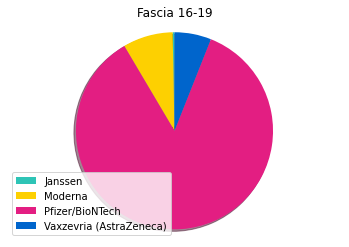

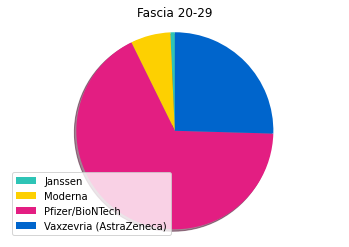

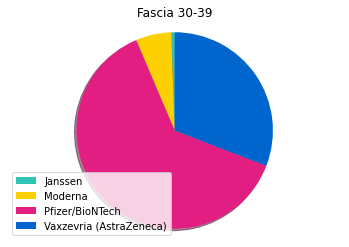

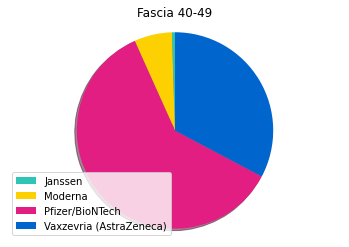

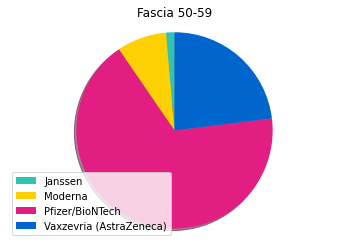

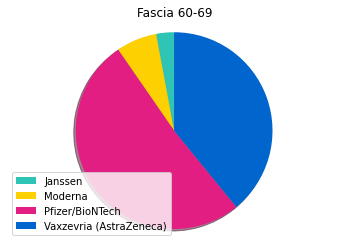

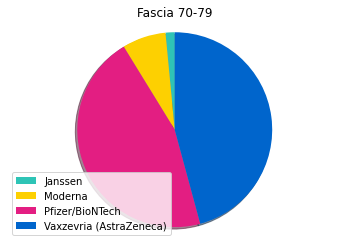

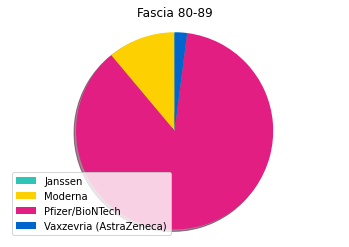

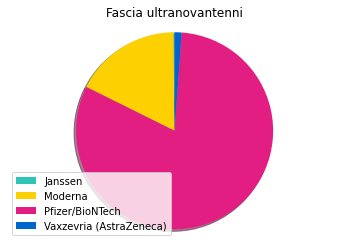

In [176]:
pie_graph_fornitore(fasce['16-19'], "Fascia 16-19")
pie_graph_fornitore(fasce['20-29'], "Fascia 20-29")
pie_graph_fornitore(fasce['30-39'], "Fascia 30-39")
pie_graph_fornitore(fasce['40-49'], "Fascia 40-49")
pie_graph_fornitore(fasce['50-59'], "Fascia 50-59")
pie_graph_fornitore(fasce['60-69'], "Fascia 60-69")
pie_graph_fornitore(fasce['70-79'], "Fascia 70-79")
pie_graph_fornitore(fasce['80-89'], "Fascia 80-89")
pie_graph_fornitore(fasce['90+'], "Fascia ultranovantenni")

# Grafici Treemap quadrati

In [177]:
#Mi prendo solo i fornitori e il numero di dosi che hanno consegnato in totale
dosi_tot_fornitore = consegne_vaccini_latest[['fornitore', 'numero_dosi']].groupby('fornitore')['numero_dosi'].sum()

dosi_tot_fornitore #Totale dosi consegnate per azienda

fornitore
Janssen                      505800
Moderna                     2607700
Pfizer/BioNTech            19998810
Vaxzevria (AstraZeneca)     7019480
Name: numero_dosi, dtype: int64

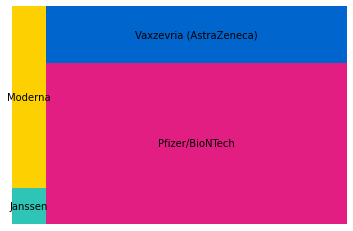

In [178]:
sizes = [dosi_tot_fornitore[0], dosi_tot_fornitore[1], dosi_tot_fornitore[2], dosi_tot_fornitore[3]]
label=[dosi_tot_fornitore.index[0], dosi_tot_fornitore.index[1], dosi_tot_fornitore.index[2], dosi_tot_fornitore.index[3]]
colors = ['#2EC4B6','#FDD001','#E31E82', '#0065CC']
sqr.plot(sizes, label = label, color = colors)
plot.axis('off')
#plot.savefig(fname='treemap.svg')
plot.show()

# Grafico lineare
### Andamento somministrazioni giornaliero

In [179]:
#Voglio sapere quante dosi vengono somministrate giornalmente e conoscere il picco
daily_andam = somministrazioni_vaccini_sl[['totale', 'data_somministrazione']].groupby('data_somministrazione')['totale'].sum()

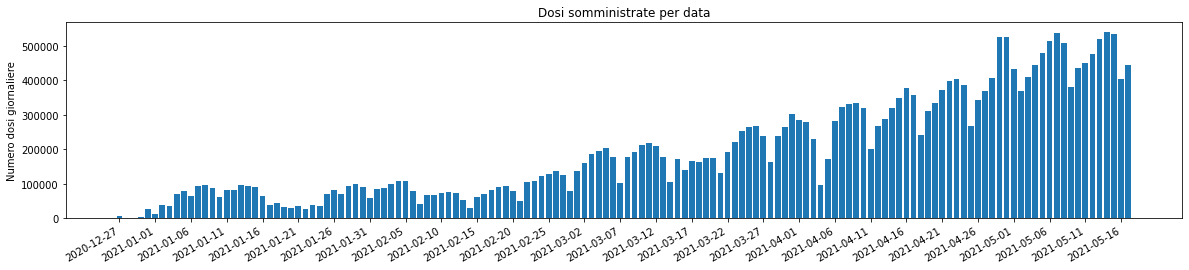

In [180]:
fig, ax = plot.subplots()

values = daily_andam.tolist()
labels = daily_andam.index.tolist()


width = 0.8

ax.bar(labels, values, width, label='Data somministrazione')

ax.set_ylabel('Numero dosi giornaliere')
ax.set_title('Dosi somministrate per data')

plot.xticks(labels[::5],  rotation='vertical')

fig.autofmt_xdate()

fig.set_size_inches(20, 4, forward=True)

#plot.savefig(fname='grafico_stackedbarplot.svg')
plot.show(range(len(labels)), values)

In [181]:
#Mi prendo l'andamento degli ultimi 7 giorni per farci una media delle somministrazioni
media_sommin = int(daily_andam[-7:].mean())
media_sommin 

480716

In [182]:
#Prendo anche il numero di persone con una dose in ogni singola regione
sommin_region = somministrazioni_vaccini[['nome_area', 'prima_dose']].groupby('nome_area')['prima_dose'].sum()
print(sommin_region)

nome_area
Abruzzo                                422732
Basilicata                             186665
Calabria                               561345
Campania                              1837436
Emilia-Romagna                        1471158
Friuli-Venezia Giulia                  389423
Lazio                                 1855282
Liguria                                512937
Lombardia                             3448566
Marche                                 488813
Molise                                 104814
Piemonte                              1384975
Provincia Autonoma Bolzano / Bozen     181610
Provincia Autonoma Trento              192377
Puglia                                1320702
Sardegna                               487545
Sicilia                               1363048
Toscana                               1136403
Umbria                                 281923
Valle d'Aosta / Vallée d'Aoste          41062
Veneto                                1665773
Name: prima_dose, dtype:

In [183]:
#Mi calcolo la percentuale delle persone rispetto al numero di abitanti (Fonte: ISTAT Gennaio 2021)
popAbr = (sommin_region[0]/1322247)*100
popBas = (sommin_region[1]/570365)*100
popCal = (sommin_region[2]/1965128)*100
popCam = (sommin_region[3]/5839084)*100
popEmR = (sommin_region[4]/4448841)*100
popFvg = (sommin_region[5]/1217872)*100
popLaz = (sommin_region[6]/5898124)*100
popLig = (sommin_region[7]/1565307)*100
popLom = (sommin_region[8]/10018806)*100
popMar = (sommin_region[9]/1538055)*100
popMol = (sommin_region[10]/310449)*100
popPie = (sommin_region[11]/4392526)*100
popBoz = (sommin_region[12]/533715)*100
popTre = (sommin_region[13]/544745)*100
popPug = (sommin_region[14]/4063888)*100
popSar = (sommin_region[15]/1653135)*100
popSic = (sommin_region[16]/5056641)*100
popTos = (sommin_region[17]/3742437)*100
popUmb = (sommin_region[18]/888908)*100
popVda = (sommin_region[19]/126883)*100
popVen = (sommin_region[20]/4907529)*100

In [184]:
#Creo un dataframe con queste statistiche
data = {'Regione':  sommin_region.index.tolist(),
        'Rapporto': [popAbr, popBas, popCal, popCam, popEmR, popFvg, popLaz, popLig, popLom, popMar, popMol, 
                     popPie, popBoz, popTre, popPug, popSar, popSic, popTos, popUmb, popVda, popVen]}
rapp_rem = pd.DataFrame (data, columns = ['Regione','Rapporto'])

print (rapp_rem.sort_values(by=['Rapporto']))

                               Regione   Rapporto
16                             Sicilia  26.955602
2                             Calabria  28.565315
15                            Sardegna  29.492147
17                             Toscana  30.365321
6                                Lazio  31.455459
3                             Campania  31.467881
11                            Piemonte  31.530263
18                              Umbria  31.715656
9                               Marche  31.781243
0                              Abruzzo  31.970729
5                Friuli-Venezia Giulia  31.975692
19      Valle d'Aosta / Vallée d'Aoste  32.362097
14                              Puglia  32.498484
1                           Basilicata  32.727289
7                              Liguria  32.769099
4                       Emilia-Romagna  33.068343
10                              Molise  33.762067
20                              Veneto  33.943213
12  Provincia Autonoma Bolzano / Bozen  34.027524


<AxesSubplot:xlabel='Regione'>

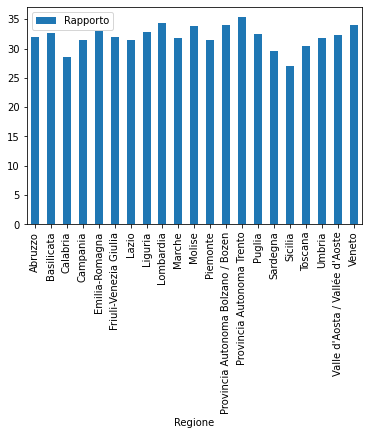

In [185]:
#Ci faccio un grafico per conoscere il picco
rapp_rem.plot(x='Regione', y='Rapporto', kind='bar')

# Previsione fine campagna vaccinale con andamento medio di 459.397 dosi/giorno

In [186]:
#Somministrazioni totali necessarie - totale somministrazioni effettuate / media
#Uso 120.000.000 dosi come se dovessimo fare 2 dosi ciascuno, Janssen trascurabile (ad oggi)

In [187]:
giorni_mancanti = int(((60000000*2) - totale_sommin) / media_sommin)
giorni_mancanti 

191

In [188]:
#Aggiungo questi giorni alla data di oggi
giorno_finale = date.today() + timedelta(days=giorni_mancanti)
giorno_finale 

datetime.date(2021, 11, 25)

In [189]:
#Immunità di gregge (80% della popolazione, 48.000.000)

In [190]:
gm_immun = int(((48000000*2) - totale_sommin)/ media_sommin)
gm_immun 

141

In [191]:
#Aggiungo questi giorni alla data di oggi
giorno_finale = date.today() + timedelta(days=gm_immun)
giorno_finale #Al momento è il 13 ottobre 2021

datetime.date(2021, 10, 6)

# Radar plot andamento delle somministazioni giornaliere

In [236]:
daysweek = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
prima_sett = daily_andam[0:7] #Primi sette giorni di campagna
mese_sett = daily_andam[31:38] #Primo mese di campagna
mezz_sett = daily_andam[(daily_andam.size//2)-3:(daily_andam.size//2)+4] #7 giorni centrali
infra_sett = daily_andam[-31:-24] #Tre settimane fa
ultima_sett = daily_andam[-7:] #Ultimi 7 giorni

In [193]:
#Dalla data mi ricavo il giorno della settimana e creo il dataframe - Prima settimana
prima_sett_values = prima_sett.index.tolist()
prima_sett_name = []

for weekday in prima_sett_values:
    weekday = datetime.datetime.strptime(weekday, '%Y-%m-%d')
    prima_sett_name.append(calendar.day_name[weekday.date().weekday()])
    
prima_sett_dict = {'Giorno': prima_sett_name,
                  'Somministrazioni': prima_sett}
prima_sett_df = pd.DataFrame(prima_sett_dict, columns = ['Giorno','Somministrazioni']).groupby(['Giorno']).sum().reindex(daysweek)

In [237]:
#Dalla data mi ricavo il giorno della settimana e creo il dataframe - Dopo il primo mese
mese_sett_values = mese_sett.index.tolist()
mese_sett_name = []

for weekday in mese_sett_values:
    weekday = datetime.datetime.strptime(weekday, '%Y-%m-%d')
    mese_sett_name.append(calendar.day_name[weekday.date().weekday()])
    
mese_sett_dict = {'Giorno': mese_sett_name,
                  'Somministrazioni': mese_sett}
mese_sett_df = pd.DataFrame(mese_sett_dict, columns = ['Giorno','Somministrazioni']).groupby(['Giorno']).sum().reindex(daysweek)

In [194]:
#Dalla data mi ricavo il giorno della settimana e creo il dataframe - Settimana centrale
mezz_sett_values = mezz_sett.index.tolist()
mezz_sett_name = []

for weekday in mezz_sett_values:
    weekday = datetime.datetime.strptime(weekday, '%Y-%m-%d')
    mezz_sett_name.append(calendar.day_name[weekday.date().weekday()])
    
mezz_sett_dict = {'Giorno': mezz_sett_name,
                  'Somministrazioni': mezz_sett}
mezz_sett_df = pd.DataFrame(mezz_sett_dict, columns = ['Giorno','Somministrazioni']).groupby(['Giorno']).sum().reindex(daysweek)

In [238]:
#Dalla data mi ricavo il giorno della settimana e creo il dataframe - Tre settimane fa
infra_sett_values = infra_sett.index.tolist()
infra_sett_name = []

for weekday in infra_sett_values:
    weekday = datetime.datetime.strptime(weekday, '%Y-%m-%d')
    infra_sett_name.append(calendar.day_name[weekday.date().weekday()])
    
infra_sett_dict = {'Giorno': infra_sett_name,
                  'Somministrazioni': infra_sett}
infra_sett_df = pd.DataFrame(infra_sett_dict, columns = ['Giorno','Somministrazioni']).groupby(['Giorno']).sum().reindex(daysweek)

In [239]:
#Dalla data mi ricavo il giorno della settimana e creo il dataframe - Ultima settimana
ultima_sett_values = ultima_sett.index.tolist()
ultima_sett_name = []

for weekday in ultima_sett_values:
    weekday = datetime.datetime.strptime(weekday, '%Y-%m-%d')
    ultima_sett_name.append(calendar.day_name[weekday.date().weekday()])
    
ultima_sett_dict = {'Giorno': ultima_sett_name,
                  'Somministrazioni': ultima_sett}
ultima_sett_df = pd.DataFrame(ultima_sett_dict, columns = ['Giorno','Somministrazioni']).groupby(['Giorno']).sum().reindex(daysweek)

In [241]:
categories = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato','Domenica']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=ultima_sett_df['Somministrazioni'].values.tolist(),
      theta=categories,
      fill='toself',
      name='Ultima settimana'
))

fig.add_trace(go.Scatterpolar(
    r =infra_sett_df['Somministrazioni'].values.tolist(),
    theta=categories,
    fill='toself',
    name='Tre settimane fa'

))

fig.add_trace(go.Scatterpolar(
      r=mezz_sett_df['Somministrazioni'].values.tolist(),
      theta=categories,
      fill='toself',
      name='Settimana centrale'
))

fig.add_trace(go.Scatterpolar(
    r =mese_sett_df['Somministrazioni'].values.tolist(),
    theta=categories,
    fill='toself',
    name='Quinta settimana'

))


fig.add_trace(go.Scatterpolar(
    r =prima_sett_df['Somministrazioni'].values.tolist(),
    theta=categories,
    fill='toself',
    name='Prima settimana'

))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, daily_andam.max()]
    )),
  showlegend=True
)
fig.show()

# Radar plot andamento ultimi 15 gg

In [243]:
ultimi_quindici_giorni = daily_andam[-15:] #Ultimi 15 giorni
#ultimi_quindici_giorni #è una series

In [244]:
list_last_15_dates = []
list_last_15_values = []
for index,value in ultimi_quindici_giorni.items():
    list_last_15_dates.append(index)
    list_last_15_values.append(value)

In [245]:
#ricaviamo i nomi dei giorni che corrispondono alle date
list_last_15_days_name = []
for value in list_last_15_dates:
    list_last_15_days_name.append(calendar.day_name[datetime.datetime.strptime(value, '%Y-%m-%d').weekday()])

In [246]:
#creiamo il dataframe (non mi serve per il radar plot)
dict_last_15_days = {'Data':list_last_15_dates, 'Giorno': list_last_15_days_name, 'Dosi':list_last_15_values}
dataframe_last_15_days = pd.DataFrame(dict_last_15_days)
dataframe_last_15_days

,Data,Giorno,Dosi
0,2021-05-03,Monday,409254
1,2021-05-04,Tuesday,445334
2,2021-05-05,Wednesday,477739
3,2021-05-06,Thursday,514180
4,2021-05-07,Friday,537761
5,2021-05-08,Saturday,507270
6,2021-05-09,Sunday,380177
7,2021-05-10,Monday,436225
8,2021-05-11,Tuesday,450055
9,2021-05-12,Wednesday,476227


In [247]:
labels = []
for i in range(len(list_last_15_dates)):
    labels.append(list_last_15_dates[i] + " " + list_last_15_days_name[i])

In [248]:
fig2 = go.Figure()

fig2.add_trace(go.Scatterpolar(
      r=list_last_15_values,
      theta=labels,
      fill='toself',
      name='Dosi giornaliere'
))

fig2.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,(ultimi_quindici_giorni.max())+(ultimi_quindici_giorni.max()*0.25)]
    )),
  showlegend=False
)
fig2.update_layout(
    title="Andamento ultimi 15 giorni",
    font_family="Courier New",
    font_color="blue",
    font_size=12,
    title_font_family="Verdana",
    title_font_color="grey",
    legend_title_font_color="green"
)

fig2.show()

### Per i dati aggiornati ad oggi puoi visitare www.brimdeep.it/vaccini con la percentuale della popolazione italiana che ha concluso il ciclo vaccinale, la percentuale delle dosi per ogni singola regione e dati sui fornitori